# **HW2 for Nonlinear Control Systems** 

> Instructor: Dr. Le Yi Wang  
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu
> Date: 10.04.2021

## Descriptions
- Source codes are and will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/NLS-HW.git).  
- *Jupyter Notebook* and *python3* are used in the solutions.

## Solutions   
#### Problem 1: 
A second-order nonlinear system is given in state space form    
$$ 
\begin{equation}
    \tag{1-1}
    \left\{
        \begin{array}{}
            \dot{x}_1=x_2 \\
             \dot{x}_2=x_1(x_1-1)-x_2
        \end{array}
    \right.
\end{equation}
$$    
Determine the equilibrium points and their stability by local linearization.


**Solution:**  
According to equation(1-1),  
$$
\begin{equation}
\tag{1-2}
\left\{
        \begin{array}{}
            x_2=0 \\
            x_1(x_1-1)-x_2=0
        \end{array}
    \right.
\end{equation}$$   
Obviously, the equilibrium points are $(x_1,x_2)=[(0,0);(1,0)]$. 

Calculate the Jacobi matrix:     
$$
\begin{equation}
\tag{1-3}
J=
\begin{bmatrix}{}
\frac{\partial{f_1}}{x_1} & \frac{\partial{f_1}}{x_2} \\
\frac{\partial{f_2}}{x_1} & \frac{\partial{f_2}}{x_2} 
\end{bmatrix}
{=}
\begin{bmatrix}{}
0 & 1 \\
2x_1-1 & -1
\end{bmatrix}
\end{equation}$$


Linearizing equation(1-1) at the equilibrium points:
1) $(x_1,x_2)=(0,0)$   
$$
\begin{equation}
\tag{1-4}
    \begin{bmatrix}
        \Delta{\dot{x_1}} \\
        \Delta{\dot{x_2}}
    \end{bmatrix}
    {=}
    J_{\mid{x_1 = 0,x_2 = 0}}
    \begin{bmatrix}
        x_1-0 \\
        x_2-0
    \end{bmatrix}
    {=}
    \begin{bmatrix}
        0  &   1 \\
        -1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix}
\end{equation}
$$

Using Python3 to calculate the nominal point of J.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
J=np.array([[0 , 1],
            [-1,-1]
           ])
w,v = np.linalg.eig(J)
print('eigvalue:',w)
print('eigvector:',v)

eigvalue: [-0.5+0.8660254j -0.5-0.8660254j]
eigvector: [[ 0.70710678+0.j          0.70710678-0.j        ]
 [-0.35355339+0.61237244j -0.35355339-0.61237244j]]


The eigenvalues are $-0.5\pm{0.8660254j}$, hence the system is stable at (0,0).

2) $(x_1,x_2)=(1,0)$   
$$
\begin{equation}
\tag{1-4}
    \begin{array}{}
    \begin{bmatrix}
        \Delta{\dot{x_1}} \\
        \Delta{\dot{x_2}}
    \end{bmatrix}
    & = 
    J_{\mid{x_1 = 1,x_2 = 0}}
    \begin{bmatrix}
        x_1-1 \\
        x_2-0
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0  &   1 \\
        1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1-1 \\
        x_2
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0  &   1 \\
        1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1\\
        x_2
    \end{bmatrix}
    {+}
     \begin{bmatrix}
        0\\
       -1
    \end{bmatrix}
    \end{array}
\end{equation}
$$

Calculate eigenvalues:

In [21]:
J=np.array([[0 , 1],
            [1,-1]
           ])
w,v = np.linalg.eig(J)
print('eigvalue:',w)
print('eigvector:',v)

eigvalue: [ 0.61803399 -1.61803399]
eigvector: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


The eigenvalues have a positive real part. The system is unstable.

#### Problem 2: 
For the system $\dot{x}=x^2+\alpha x$, depending on the parameter $\alpha$, determine the equilibrium points, and evaluate their staility for the cases $\alpha >0, \alpha =0, \alpha <0$.

**Solution:**
Equilibrium points: $ x=0,x=-\alpha$.   
Linearize the system:
$$ A=\frac{\text{d}(x^2+\alpha x)}{\text{d}x}=2x+\alpha $$

$$
\begin{equation}
\left\{
    \begin{array}{}
        A_{\mid{x=0}}=\alpha \\
        A_{\mid{x=-\alpha}}=-\alpha
    \end{array}
\right.
\end{equation}
$$
$$
\begin{equation}
\left\{
    \begin{array}{}
        \frac{\text{d}(x-0)}{\text{d}t}=A_{\mid{x=0}}(x-0) 
        \Rightarrow 
        \Delta{\dot{x}} = \alpha \Delta x \\
        \frac{\text{d}(x+\alpha)}{\text{d}t}=A_{\mid{x=-\alpha}}(x+\alpha) 
        \Rightarrow 
        \Delta{\dot{x}} = -\alpha \Delta x
    \end{array}
\right.
\end{equation}
$$

Hence,   
$\alpha >0$, the system is unstable at $x=0$ while stable at $x=-\alpha$.   
$\alpha =0$, the system is inconclusive.    
$\alpha <0$, the system is at $x=0$ while unstable at $x=-\alpha$.

#### Problem 3: 
Draw the phase portrait and discuss the properties of the linear, unity feedback control system of open-loop transfer function   
$$ G(p)=\frac{10}{p(1+0.1p)} $$

**Solution:**
The system can be implied as:  
$$
\begin{equation}
\tag{3-1}
    \left\{
        \begin{array}{}
            e=r-y  \\
            y=G(p)e\Rightarrow (0.1p^2+p)y=10e 
        \end{array}
    \right.
\end{equation}$$

$$
\begin{equation}
\tag{3-2}
\Rightarrow
    \left\{
    \begin{array}{}
        y=\frac{100}{p^2+10p+100}r \\
        \ddot{y}+10\dot{y}+100y=100r
    \end{array}
    \right.
\end{equation}$$
let $p^2+10p+100=0$, we have
$$
\begin{equation}
\tag{3-3}
    \begin{array}{}
        p &= \frac{-10\pm \sqrt{-300}}{2} \\
          &=-5 \pm j10 \sqrt{3}
    \end{array}
\end{equation}$$
let $x_1=y,x_2=\dot{y},r=r(t)=0$, we have     
$$
\begin{equation}
\tag{3-4}
    \left\{
        \begin{array}{}
            \dot{x_1} = x_2  \\
            \dot{x_2} = -10x_1-100x_2
        \end{array}
    \right.
\end{equation}$$  

Obviously, the singular point is (0,0).
Refer to case 4 in lecture 2, the Jordan form matrix is 
$$
\begin{equation}
\tag{3-5}
    J=
    \begin{bmatrix}{}
          -5          &  -10\sqrt{3} \\
          10\sqrt{3}  &  -5
    \end{bmatrix}
\end{equation}$$
$$
\begin{equation}
\tag{3-6}
    \left\{
        \begin{array}{}
            \dot{z_1} = -5z_1-10\sqrt{3}z_2  \\
            \dot{z_2} = 10\sqrt{3}z_1-5z_2
        \end{array}
    \right.
\end{equation}$$  

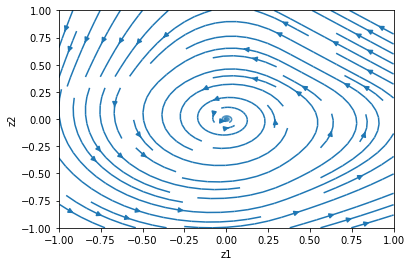

In [99]:
import pylab as plb
x1values, x2values = plb.meshgrid(np.linspace(-1, 1, 4), np.linspace(-1, 1, 4),sparse=True)
x1dot = -5*x1values-10*3*np.sqrt(3)*x2values
x2dot = 10*3*np.sqrt(3)*x1values-5*x2values
plb.streamplot(x1values, x2values, x1dot, x2dot)
plb.xlabel('z1')
plb.ylabel('z2')
plb.show()

The system is stable focus at (0,0).

#### Problem4:   
Draw the phase portraits of the following systems, using isoclines.